# Team 20:

### Dario Melconian

### Bryce Chevallier

In [128]:
#!pip install featurewiz (for autoML random forest run)

## Import, Data Cleaning, Pre-Processing, Feature Engineering

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt 
#import featurewiz

from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
#from featurewiz import featurewiz
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, f1_score

In [138]:
# import the data
df = pd.read_csv("DataQuest Dataset - train_data.csv")
df.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,1,10,2018,3,31,0,1,Meal Plan 1,0,Room_Type 1,1,0,Corporate,0,0,0,95.00,0,Canceled
1,2,116,2018,2,28,2,1,Meal Plan 1,0,Room_Type 1,1,0,Online,0,0,0,61.00,0,Canceled
2,3,11,2018,7,25,1,2,Meal Plan 1,0,Room_Type 1,2,1,Online,0,0,0,129.75,1,Not_Canceled
3,4,3,2017,9,12,0,1,Meal Plan 1,0,Room_Type 1,2,0,Online,0,0,0,152.00,3,Not_Canceled
4,5,28,2018,3,7,1,3,Meal Plan 1,0,Room_Type 1,2,0,Offline,0,0,0,87.00,0,Not_Canceled


In [4]:
df.shape

(29020, 19)

In [5]:
df = df.drop(df[df['MealPlan'] == 'Meal Plan 3'].index)
#df = df.drop('Meal Plan 3', axis=1)
df.shape

(29015, 19)

<Figure size 432x288 with 0 Axes>

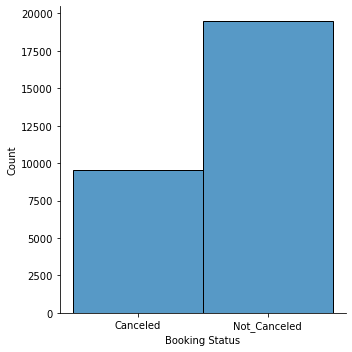

In [6]:
fig = plt.figure()
sns.displot(df['BookingStatus'])
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

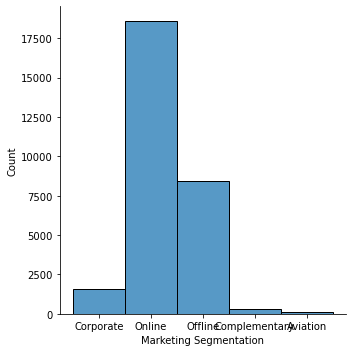

In [7]:
fig = plt.figure()
sns.displot(df['MarketSegment'])
plt.xlabel('Marketing Segmentation')
plt.ylabel('Count')
plt.show()

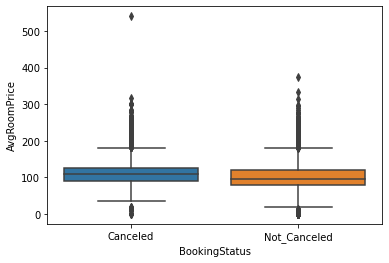

In [8]:
fig = plt.figure()
ax = sns.boxplot(x = 'BookingStatus', y = 'AvgRoomPrice',  data = df)
plt.show()

In [9]:
df = df[df['AvgRoomPrice'] <= 500]

In [11]:
df.shape

(29014, 18)

In [10]:
df = df.drop('BookingID', axis=1)

In [12]:
table = pd.crosstab(df['RepeatedGuest'], df['BookingStatus'], margins = False)
table

BookingStatus,Canceled,Not_Canceled
RepeatedGuest,,
0,9504,18767
1,14,729


<Figure size 432x288 with 0 Axes>

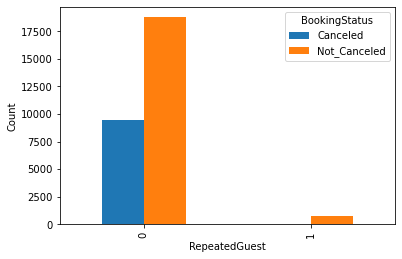

In [13]:
fig = plt.figure()
ax = table.plot(kind = 'bar', stacked = False)
ax.set_ylabel('Count')
plt.show()

In [14]:
val = 14/(14+730)
print("about 1.8% of repeated guests have cancelled: ", val)

about 1.8% of repeated guests have cancelled:  0.01881720430107527


In [15]:
val = 9506/(9506+18770)
print("about 33.6% of non-repeated guests have cancelled: ", val)

about 33.6% of non-repeated guests have cancelled:  0.3361861649455368


In [16]:
df.isna().sum()

LeadTime                   0
ArrivalYear                0
ArrivalMonth               0
ArrivalDate                0
NumWeekendNights           0
NumWeekNights              0
MealPlan                   0
Parking                    0
RoomType                   0
NumAdults                  0
NumChildren                0
MarketSegment              0
RepeatedGuest              0
NumPrevCancellations       0
NumPreviousNonCancelled    0
AvgRoomPrice               0
SpecialRequests            0
BookingStatus              0
dtype: int64

In [17]:
df = df.drop('RoomType', axis=1)

In [18]:
df.shape

(29014, 17)

In [19]:
# one-hot encode the categorical variables (4 of them, including response):
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
# Create an instance of the LabelEncoder class
encoder = LabelEncoder()

# Set the mapping between labels and encoded values
encoder.fit(['Not_Canceled', 'Canceled'])

# Encode the response variable using the specified mapping
df['BookingStatus'] = encoder.transform(df['BookingStatus'])

# Print the resulting DataFrame
df.head()

,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,10,2018,3,31,0,1,Meal Plan 1,0,1,0,Corporate,0,0,0,95.00,0,0
1,116,2018,2,28,2,1,Meal Plan 1,0,1,0,Online,0,0,0,61.00,0,0
2,11,2018,7,25,1,2,Meal Plan 1,0,2,1,Online,0,0,0,129.75,1,1
3,3,2017,9,12,0,1,Meal Plan 1,0,2,0,Online,0,0,0,152.00,3,1
4,28,2018,3,7,1,3,Meal Plan 1,0,2,0,Offline,0,0,0,87.00,0,1


In [21]:
# replace 0 with 1 and vise-versa for response comprehension purposes
df['BookingStatus'] = df['BookingStatus'].replace({0: 1, 1: 0})
df.head()

,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,10,2018,3,31,0,1,Meal Plan 1,0,1,0,Corporate,0,0,0,95.00,0,1
1,116,2018,2,28,2,1,Meal Plan 1,0,1,0,Online,0,0,0,61.00,0,1
2,11,2018,7,25,1,2,Meal Plan 1,0,2,1,Online,0,0,0,129.75,1,0
3,3,2017,9,12,0,1,Meal Plan 1,0,2,0,Online,0,0,0,152.00,3,0
4,28,2018,3,7,1,3,Meal Plan 1,0,2,0,Offline,0,0,0,87.00,0,0


In [22]:
df.isna().sum()

LeadTime                   0
ArrivalYear                0
ArrivalMonth               0
ArrivalDate                0
NumWeekendNights           0
NumWeekNights              0
MealPlan                   0
Parking                    0
NumAdults                  0
NumChildren                0
MarketSegment              0
RepeatedGuest              0
NumPrevCancellations       0
NumPreviousNonCancelled    0
AvgRoomPrice               0
SpecialRequests            0
BookingStatus              0
dtype: int64

In [23]:
# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

cat_vars = ['MealPlan', 'MarketSegment']

# Specify which columns to encode and fit the encoder to the data
encoder.fit(df[cat_vars])

encoded_vars = encoder.transform(df[cat_vars]).toarray()

encoded = pd.DataFrame(encoded_vars,columns=encoder.get_feature_names(cat_vars))

# fix the indices
df = df.reset_index(drop=True)
encoded = encoded.reset_index(drop=True)
df = pd.concat([df, encoded], axis =1)

print(df.shape)


print(df.head())
print(encoded.head())

(29014, 25)
   LeadTime  ArrivalYear  ArrivalMonth  ArrivalDate  NumWeekendNights  \
0        10         2018             3           31                 0   
1       116         2018             2           28                 2   
2        11         2018             7           25                 1   
3         3         2017             9           12                 0   
4        28         2018             3            7                 1   

   NumWeekNights     MealPlan  Parking  NumAdults  NumChildren  ...  \
0              1  Meal Plan 1        0          1            0  ...   
1              1  Meal Plan 1        0          1            0  ...   
2              2  Meal Plan 1        0          2            1  ...   
3              1  Meal Plan 1        0          2            0  ...   
4              3  Meal Plan 1        0          2            0  ...   

  SpecialRequests  BookingStatus  MealPlan_Meal Plan 1  MealPlan_Meal Plan 2  \
0               0              1          

In [25]:
df.shape
df.columns

Index(['LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate',
       'NumWeekendNights', 'NumWeekNights', 'MealPlan', 'Parking', 'NumAdults',
       'NumChildren', 'MarketSegment', 'RepeatedGuest', 'NumPrevCancellations',
       'NumPreviousNonCancelled', 'AvgRoomPrice', 'SpecialRequests',
       'BookingStatus', 'MealPlan_Meal Plan 1', 'MealPlan_Meal Plan 2',
       'MealPlan_Not Selected', 'MarketSegment_Aviation',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Offline', 'MarketSegment_Online'],
      dtype='object')

In [ ]:
df.head()
df.shape

In [26]:
df[df.isna().any(axis=1)]

,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,NumAdults,NumChildren,...,SpecialRequests,BookingStatus,MealPlan_Meal Plan 1,MealPlan_Meal Plan 2,MealPlan_Not Selected,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Offline,MarketSegment_Online


In [28]:
df = df.drop('MealPlan_Not Selected', axis=1)
df = df.drop('MarketSegment_Online', axis=1)

In [29]:
df.isna().sum()

LeadTime                       0
ArrivalYear                    0
ArrivalMonth                   0
ArrivalDate                    0
NumWeekendNights               0
NumWeekNights                  0
MealPlan                       0
Parking                        0
NumAdults                      0
NumChildren                    0
MarketSegment                  0
RepeatedGuest                  0
NumPrevCancellations           0
NumPreviousNonCancelled        0
AvgRoomPrice                   0
SpecialRequests                0
BookingStatus                  0
MealPlan_Meal Plan 1           0
MealPlan_Meal Plan 2           0
MarketSegment_Aviation         0
MarketSegment_Complementary    0
MarketSegment_Corporate        0
MarketSegment_Offline          0
dtype: int64

In [39]:
df = df.drop('MealPlan', axis=1)
df = df.drop('MarketSegment', axis=1)

In [40]:
X = df.drop(['BookingStatus'],axis=1)
#X = pd.DataFrame(df.data, columns=df.feature_names)
print(X.columns)

y = df.BookingStatus.values 
print(y)

Index(['LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate',
       'NumWeekendNights', 'NumWeekNights', 'Parking', 'NumAdults',
       'NumChildren', 'RepeatedGuest', 'NumPrevCancellations',
       'NumPreviousNonCancelled', 'AvgRoomPrice', 'SpecialRequests',
       'MealPlan_Meal Plan 1', 'MealPlan_Meal Plan 2',
       'MarketSegment_Aviation', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Offline'],
      dtype='object')
[1 1 0 ... 0 1 0]


In [41]:
# not going to scale the X's right now, can look into this later if we need to improve model
#X_scaled =  StandardScaler().fit_transform(X) 

In [42]:
# split data into train and validate 
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2,stratify=y, random_state=1)

## Random Forest Model

In [43]:
#Define the classifier
forest = RandomForestClassifier(n_estimators=1000, 
                       criterion='entropy', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=0.001, 
                       min_weight_fraction_leaf=0.0, 
                       max_features='auto',  
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0001, 
                       bootstrap=True, 
                       oob_score=True,  
                       n_jobs=-1, 
                       random_state=20190305, 
                       verbose=1, 
                       warm_start=False, 
                       class_weight='balanced'
                                    )

In [44]:
# fit the forest model
forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.0s finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_impurity_decrease=0.0001, min_samples_leaf=0.001,
                       n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=20190305, verbose=1)

In [45]:
# Apply the model to the test set.
rf_pred_class_test = forest.predict(X_valid)
rf_probs_test = forest.predict_proba(X_valid)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.5s finished


In [67]:
# Get the predicted probabilities for each class
probs = forest.predict_proba(X_valid)

# Apply a custom threshold to the probabilities (we played around with this)
threshold = 0.44
rf_pred_class_test = (probs[:, 1] > threshold).astype(int)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.6s finished


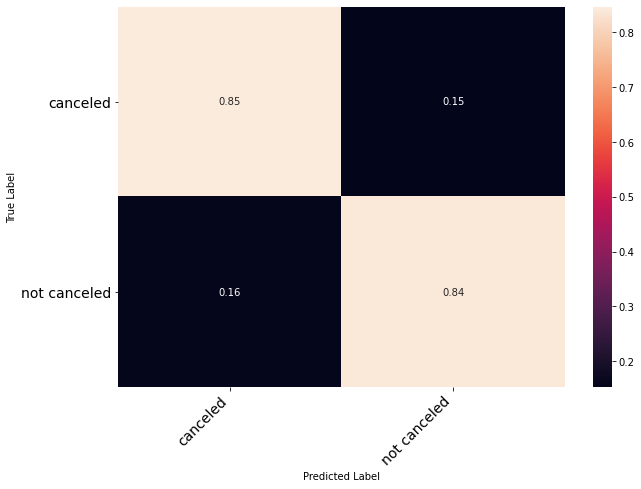

In [68]:
# Calculate confusion matrix
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

confusion_matrix_rf = confusion_matrix(y_true = y_valid, 
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['canceled', 'not canceled'], columns=['canceled', 'not canceled'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# Make it nicer
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# show plot
plt.show()

In [69]:
# print the score
forest.oob_score_

0.8576536986773513

Out of Bag score was assessed on the Scikit learn's random forest we developed.

we can conclude that the forest model correctly predicted the target variable for approx. 85.77% of the out-of-bag samples.

The OOB score is a measure of prediction accurcy of the RF model. It does this by estimating how well the model will perform using new, unseen data, which is known as our validation dataset.

Predicting correctly 85.77% of the time is relatively accurate and has a good predictive power. 

We will also look at other metrics such as precision, recall, F1 score, and accuracy to further assess the overall quality of this model before attempting another one.

However, we would like to look further into this via an AutoML RF, and perhaps a XGBoost model. 

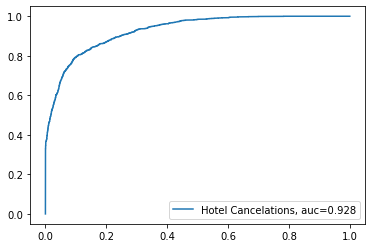

In [70]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_valid, rf_probs_test[:,1])

# Save the AUC in a variable to show it 
auc = np.round(roc_auc_score(y_true = y_valid, 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="Hotel Cancelations, auc="+str(auc))
plt.legend(loc=4)
plt.show()

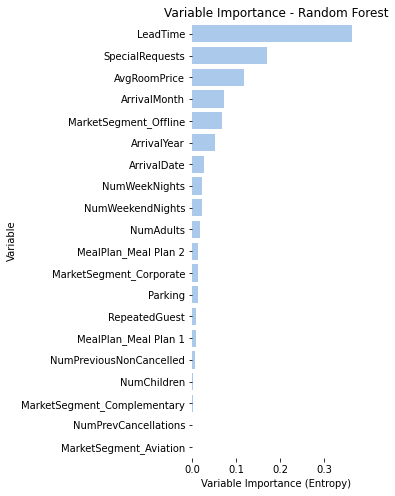

In [71]:
# Plot variable importance
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - Random Forest")
sns.set_color_codes("pastel")
sns.barplot(y=[X_train.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)

## XGBoost Model

In [79]:
# new classifier for XGBoost ML algorithm with IDEAL parameters after performing grid searches
XGB_Best = XGBClassifier(max_depth=5,                 
                            learning_rate=0.1,            
                            n_estimators=250,              
                            verbosity=1,                 
                            objective='binary:logistic',  
                            booster='gbtree',             
                            n_jobs=-1,                     
                            gamma=0.2,                  
                            subsample=0.8,              
                            colsample_bytree=0.8,          
                            colsample_bylevel=1,          
                            colsample_bynode=1,           
                            scale_pos_weight=2,           
                            base_score=0.5,               
                            random_state=20201107 ,       
                            reg_lambda=1,
                            reg_alpha=0.5,
                            min_child_weight=1
                            
                            )

In [73]:
# param grid
param_grid = dict({'n_estimators': [250],
                   'max_depth': [5],
                 'learning_rate' : [0.1],
                   'subsample':[0.8],
                   'colsample_bytree':[0.8],
                   'min_child_weight': [1, 5, 10],
              'gamma': [0, 0.1, 0.2],
              'reg_alpha': [0, 0.1, 0.5],
              'reg_lambda': [0.5, 1, 1.5],
              'scale_pos_weight': [1, 2, 5]
                  })
param_grid

{'n_estimators': [250],
 'max_depth': [5],
 'learning_rate': [0.1],
 'subsample': [0.8],
 'colsample_bytree': [0.8],
 'min_child_weight': [1, 5, 10],
 'gamma': [0, 0.1, 0.2],
 'reg_alpha': [0, 0.1, 0.5],
 'reg_lambda': [0.5, 1, 1.5],
 'scale_pos_weight': [1, 2, 5]}

In [74]:
# combining X_train and y_train: on the bookingstatus response var
X_train['BookingStatus'] = y_train

X_train

<ipython-input-74-1c518491218e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['BookingStatus'] = y_train


,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,Parking,NumAdults,NumChildren,RepeatedGuest,...,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,MealPlan_Meal Plan 1,MealPlan_Meal Plan 2,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Offline,BookingStatus
21719,142,2018,5,9,1,2,0,2,0,0,...,0,125.33,1,1.0,0.0,0.0,0.0,0.0,0.0,0
8806,16,2018,2,3,1,4,0,2,0,0,...,0,74.80,1,1.0,0.0,0.0,0.0,0.0,0.0,0
1865,6,2018,12,30,0,2,0,2,1,0,...,0,158.00,2,1.0,0.0,0.0,0.0,0.0,0.0,0
27530,112,2018,12,5,1,3,0,2,0,0,...,0,126.30,2,0.0,1.0,0.0,0.0,0.0,0.0,1
24751,71,2018,3,18,2,2,0,2,0,0,...,0,90.95,1,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13094,30,2018,6,2,0,2,0,2,0,0,...,0,140.00,0,1.0,0.0,0.0,0.0,0.0,1.0,0
11555,32,2018,10,29,0,1,0,2,0,0,...,0,109.00,2,0.0,0.0,0.0,0.0,0.0,0.0,0
28661,1,2018,6,7,0,1,0,2,0,1,...,25,0.00,3,1.0,0.0,0.0,1.0,0.0,0.0,0
7194,185,2018,7,18,2,5,0,2,0,0,...,0,90.95,0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [75]:
# turn a true validation set as a subset of the train, so the validation made before is technically test
true_val = X_train.sample(frac = 0.6,               
                                       random_state = 20201107   
                                       )


# Crossvalidation
cv_object = StratifiedKFold(n_splits=3)

In [76]:
# grid search object.
GridXGB = GridSearchCV(XGB_Bankloan,         
                       param_grid,         
                       cv = cv_object,        
                       scoring = 'roc_auc', 
                       n_jobs = -1,          
                       refit = False,       
                       verbose = 1          
                      )

In [77]:
#true_val_y = y_train

In [129]:
# TRAIN GRID SEARCH

# this is commented out as it took 20 mins to run, it is the hypertuning paramterization 
# this is how we determined which parameters were ideal for our model via best parameters and results of the grid search carried out in cells below
# code below for this cell:

#GridXGB.fit(true_val.iloc[:, :-1], true_val['BookingStatus'])

In [ ]:
# Show best params
GridXGB.best_params_

In [ ]:
# shows results
GridXGB.cv_results_

In [ ]:
# Create XGB with best parameters.
XGB_Best = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'), 
                            learning_rate=GridXGB.best_params_.get('learning_rate'), 
                            n_estimators=GridXGB.best_params_.get('n_estimators'), 
                            verbosity=1,                  
                            objective='binary:logistic',  
                            booster='gbtree',             
                            n_jobs=4,                     
                            gamma=GridXGB.best_params_.get('gamma'),                  
                            subsample=GridXGB.best_params_.get('subsample'),                  
                            colsample_bytree=GridXGB.best_params_.get('subsample'),           
                            colsample_bylevel=1,          
                            colsample_bynode=1,           
                            reg_alpha=GridXGB.best_params_.get('reg_alpha'),                 
                            reg_lambda=GridXGB.best_params_.get('reg_lambda'),                 
                            scale_pos_weight=GridXGB.best_params_.get('scale_pos_weight'),           
                            base_score=0.5,               
                            random_state=20201107,        
                            min_child_weight=GridXGB.best_params_.get('min_child_weight')
                            )

In [80]:
# Train over all training data.
XGB_Best.fit(X_train.iloc[:, :-1], X_train['BookingStatus'])

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=20201107, ...)

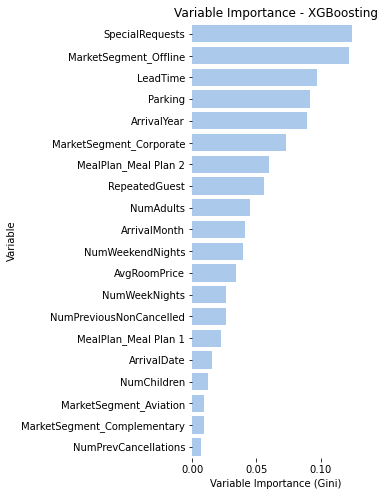

In [81]:
# Plot variable importance
importances = XGB_Best.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[X_train.iloc[:, :-1].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)

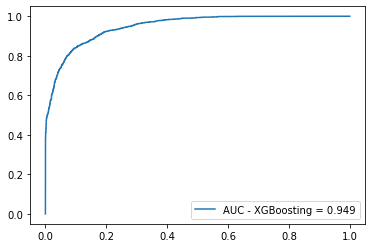

In [82]:
# Calculate probability
probTest = XGB_Best.predict_proba(X_valid)
probTest = probTest[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_valid, 
                                 probTest)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = y_valid, 
                             y_score = probTest),
               decimals = 3)

# Create and show AUC plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

In [83]:
# make prediction 
preds = XGB_Best.predict(X_valid) 

# check performance
accuracy_score(preds,y_valid)

0.8790280889195243

In [84]:
# Apply the model to the test set.
rf_pred_class_test = XGB_Best.predict(X_valid)
rf_probs_test = XGB_Best.predict_proba(X_valid)

In [115]:
# Get the predicted probabilities for each class
probs = XGB_Best.predict_proba(X_valid)

# Apply a custom threshold to the probabilities
threshold = 0.53
rf_pred_class_test = (probs[:, 1] > threshold).astype(int)

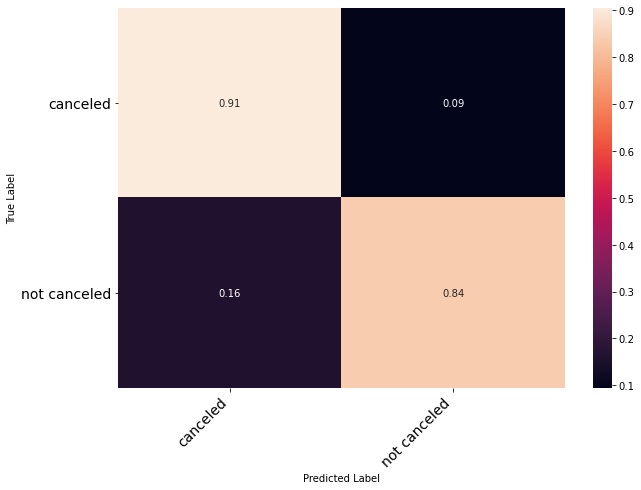

In [116]:
confusion_matrix_rf = confusion_matrix(y_true = y_valid, 
                    y_pred = rf_pred_class_test)

# Turn matrix to percentages
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]

# Turn to dataframe
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['canceled', 'not canceled'], columns=['canceled', 'not canceled'], 
)

# Parameters of the image
figsize = (10,7)
fontsize=14

# Create image
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)

# Add labels
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# show the plot
plt.show()

# we have to focus on the false pos = which is.... """""" canceled predicted, but didnt actually canceled """"""
# we cant predict a cancelation when its not actually one, as this affects the company in a detrimental manner
#therefpre; predict=cancel, true=not cancel

In [125]:
# Get the predicted probabilities for each class
probs = XGB_Best.predict_proba(X_valid)

# Apply a custom threshold to the probabilities
threshold = 0.53
y_pred = (probs[:, 1] > threshold).astype(int)

In [127]:
# obtain the predicted labels from XGBoost model

# calculate precision, recall, and F1 score
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

# print the results
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Precision: 0.8128
Recall: 0.8367
F1 Score: 0.8245


In [ ]:
# At the end, we must use the true testing dataset to generate our predictions

# the code below is for using the provided testing data to generate scores to be compared with the true values

In [190]:
df_test = pd.read_csv("DataQuest Dataset - test_data.csv")
df_test.head()

df_test = df_test.drop(df_test[df_test['MealPlan'] == 'Meal Plan 3'].index)

df_test = df_test[df_test['AvgRoomPrice'] <= 500]

df_test = df_test.drop('BookingID', axis=1)

df_test = df_test.drop('RoomType', axis=1)

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

cat_vars = ['MealPlan', 'MarketSegment']

# Specify which columns to encode and fit the encoder to the data
encoder.fit(df_test[cat_vars])

encoded_vars = encoder.transform(df_test[cat_vars]).toarray()

encoded = pd.DataFrame(encoded_vars,columns=encoder.get_feature_names(cat_vars))

# fix the indices
df_test = df_test.reset_index(drop=True)
encoded = encoded.reset_index(drop=True)
df_test = pd.concat([df_test, encoded], axis =1)

df_test = df_test.drop('MealPlan_Not Selected', axis=1)
df_test = df_test.drop('MarketSegment_Online', axis=1)

df_test = df_test.drop('MealPlan', axis=1)
df_test = df_test.drop('MarketSegment', axis=1)

#DROP THE RESPONSE###
df_test = df_test.drop('BookingStatus', axis=1)

In [191]:
# Get the predicted probabilities for each class on TEST DATA
probs = XGB_Best.predict_proba(df_test)

# Apply a custom threshold to the probabilities
threshold = 0.53
y_pred = (probs[:, 1] > threshold).astype(int)

In [192]:
print(y_pred)
y_pred.shape

[1 0 1 ... 0 0 1]


(7255,)

In [193]:
# add the y
df_test['BookingStatus'] = y_pred

In [194]:
df_test.head()

,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,Parking,NumAdults,NumChildren,RepeatedGuest,...,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,MealPlan_Meal Plan 1,MealPlan_Meal Plan 2,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Offline,BookingStatus
0,211,2018,5,20,0,2,0,2,0,0,...,0,100.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,121,2018,7,6,0,4,0,3,0,0,...,0,96.9,1,1.0,0.0,0.0,0.0,0.0,1.0,0
2,30,2018,11,26,2,1,0,2,0,0,...,0,88.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,256,2018,6,15,0,2,0,2,0,0,...,0,115.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1
4,122,2018,11,25,0,1,0,1,0,0,...,0,67.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [195]:
mapping = {0: 'Not Canceled', 1: 'Canceled'}

# make the 0's and 1's back into canceled and not canceled 
df_test['BookingStatus'] = df_test['BookingStatus'].map(mapping)

In [196]:
# view changes
df_test.head()

,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,Parking,NumAdults,NumChildren,RepeatedGuest,...,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,MealPlan_Meal Plan 1,MealPlan_Meal Plan 2,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Offline,BookingStatus
0,211,2018,5,20,0,2,0,2,0,0,...,0,100.0,0,1.0,0.0,0.0,0.0,0.0,0.0,Canceled
1,121,2018,7,6,0,4,0,3,0,0,...,0,96.9,1,1.0,0.0,0.0,0.0,0.0,1.0,Not Canceled
2,30,2018,11,26,2,1,0,2,0,0,...,0,88.0,0,0.0,0.0,0.0,0.0,0.0,0.0,Canceled
3,256,2018,6,15,0,2,0,2,0,0,...,0,115.0,1,0.0,1.0,0.0,0.0,0.0,0.0,Canceled
4,122,2018,11,25,0,1,0,1,0,0,...,0,67.0,0,1.0,0.0,0.0,0.0,1.0,0.0,Not Canceled


In [197]:
# export this test dataset with our predictions
df_test.to_csv('team_20.csv', index=False)